In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,r2_score,confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import scale,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [2]:
import warnings 
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [3]:
data=pd.read_csv("diabetes.csv")
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [4]:
y=data["Outcome"]
X=data.drop(["Outcome"],axis=1)

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [6]:
def uzunluk(train,test,train_,test_):
  print(f"""
          shape of X_train:{train.shape}
          shape of X_test : {test.shape}
          shape of y_train : {train_.shape}
          shape of y_test: {test_.shape}
        """)
  
uzunluk(X_train,X_test,y_train,y_test)


          shape of X_train:(537, 8)
          shape of X_test : (231, 8)
          shape of y_train : (537,)
          shape of y_test: (231,)
        


Model ve Tahmin

In [7]:
cart_model=DecisionTreeClassifier().fit(X_train,y_train)
cart_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [8]:
y_pred=cart_model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.70995670995671


Model Tuning

In [9]:
cart=DecisionTreeClassifier()

In [11]:
cart_params={'max_depth':[1,3,5,8,10],
             "min_samples_split": [2,3,5,10,20]}

In [12]:
cart_cv_model=GridSearchCV(cart,cart_params,cv=10,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_s

In [13]:
cart_cv_model.best_score_

0.763487071977638

In [14]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 20}

In [17]:
cart_tuned=DecisionTreeClassifier(max_depth=5, min_samples_split=20).fit(X_train,y_train)
y_pred=cart_tuned.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7532467532467533


Random Forests Model ve Tahmin

In [18]:
rf_model=RandomForestClassifier().fit(X_train,y_train)
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [20]:
y_pred=rf_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7619047619047619

Tuning

In [21]:
rfmodel=RandomForestClassifier()

In [22]:
rf_params={'max_depth': [100,200,500,1000],'max_features': [3,5,7,8],
           "min_samples_split" : [2,5,10,20]}
##max_features'ta en son 8 alabildik çünkü değişken sayısı 8 zaten 

In [23]:
rf_cv_model=GridSearchCV(rfmodel,rf_params,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END .max_depth=100, max_features=3, min_samples_split=2; total time=   0.3s
[CV] END .max_depth=100, max_features=3, min_samples_split=2; total time=   0.2s
[CV] END .max_depth=100, max_features=3, min_samples_split=2; total time=   0.2s
[CV] END .max_depth=100, max_features=3, min_samples_split=2; total time=   0.2s
[CV] END .max_depth=100, max_features=3, min_samples_split=2; total time=   0.2s
[CV] END .max_depth=100, max_features=3, min_samples_split=5; total time=   0.2s
[CV] END .max_depth=100, max_features=3, min_samples_split=5; total time=   0.2s
[CV] END .max_depth=100, max_features=3, min_samples_split=5; total time=   0.2s
[CV] END .max_depth=100, max_features=3, min_samples_split=5; total time=   0.2s
[CV] END .max_depth=100, max_features=3, min_samples_split=5; total time=   0.2s
[CV] END max_depth=100, max_features=3, min_samples_split=10; total time=   0.2s
[CV] END max_depth=100, max_features=3, min_sam

In [24]:
rf_cv_model.best_score_

0.7876773970231914

In [25]:
rf_cv_model.best_params_

{'max_depth': 500, 'max_features': 7, 'min_samples_split': 2}

In [27]:
rf_tuned=RandomForestClassifier(max_depth=500, max_features=7, min_samples_split=2).fit(X_train,y_train)
y_pred=rf_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7272727272727273

Değişken Seçimi

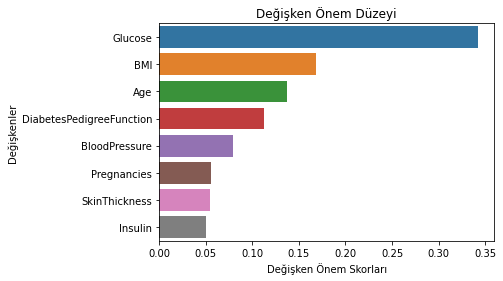

In [29]:
feature_imp=pd.Series(rf_tuned.feature_importances_,index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyi")
plt.show()